<a href="https://colab.research.google.com/github/raphmelgom/Deep_Learning-Fashion_MNIST-VGG16/blob/main/Deep_Learning_Fashion_MNIST_VGG16_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Sobre a VGG16
A VGG16 é uma arquitetura de rede neural convolucional profunda que foi desenvolvida pela Visual Geometry Group (VGG) da Universidade de Oxford. Ela é composta por 16 camadas, incluindo 13 camadas convolucionais e 3 camadas totalmente conectadas. A VGG16 é amplamente utilizada em tarefas de classificação de imagens, reconhecimento de objetos e detecção de objetos em diversas aplicações.
##Sobre o dataset utilizado
O Fashion MNIST é um conjunto de dados de imagens que contém 70.000 imagens de peças de roupa em 10 categorias diferentes, cada uma com 7.000 imagens. As imagens têm dimensão de 28x28 pixels e estão em escala de cinza. O conjunto de dados é frequentemente usado para fins educacionais e para testar algoritmos de visão computacional, como classificação de imagens e detecção de objetos. Ele está disponível no Keras e pode ser facilmente carregado usando a função load_data().

#1.Importando

In [3]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.applications import VGG16
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam
import cv2
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

#2.Carregando o Dataset

In [4]:
# Carregando o conjunto de dados Fashion MNIST do Keras
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

##2.1 Visualizando as Classes

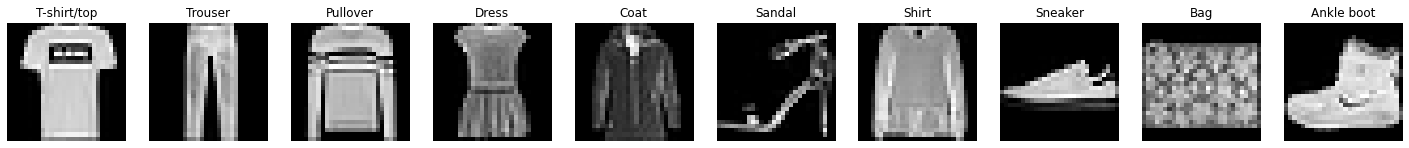

In [5]:
# Define o nome das classes do Fashion MNIST
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

# Plota uma imagem aleatória de cada classe
fig, axs = plt.subplots(1, 10, figsize=(25, 20))
for i in range(10):
    axs[i].imshow(train_images[np.where(train_labels == i)][0], cmap="gray")
    axs[i].set_title(class_names[i])
    axs[i].axis("off")
plt.show()


#3.Pré-Processamento
##3.1 Normalizando

In [6]:
# Normalizando as imagens de treinamento e teste para que os valores estejam entre 0 e 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [47]:
#Exemplo no índice 0
print(train_images[0])

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


In [8]:
# Convertendo as etiquetas de treinamento e teste em vetores de categoria
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [44]:
#Exemplo no índice 0
print(train_labels[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# 4.Carregando a VGG16

In [46]:
# Carregando a VGG16 sem as camadas densas
vgg = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

In [11]:
# Redimensionando as imagens de treinamento e teste para (48, 48, 3)
train_images = np.array([cv2.resize(img, (48, 48)) for img in train_images])
test_images = np.array([cv2.resize(img, (48, 48)) for img in test_images])

In [12]:
# Converter as imagens em escala de cinza para RGB
train_images = np.stack((train_images,) * 3, axis=-1)
test_images = np.stack((test_images,) * 3, axis=-1)

In [13]:
# Congelando as camadas convolucionais da VGG16
for layer in vgg.layers:
    layer.trainable = False

#5.Arquitetura Modelo Deep Learning->Rede Neural Convolucional-VGG16 (CNN)

In [14]:
# Criando as camadas densas
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


In [15]:
# Compilando o modelo com a função de perda, otimizador e métricas
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [16]:
# Treinando o modelo
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 [==============================] - 30s 23ms/step - loss: 0.8600 - accuracy: 0.7443 - val_loss: 0.5659 - val_accuracy: 0.8077
Epoch 2/10
938/938 [==============================] - 23s 25ms/step - loss: 0.5027 - accuracy: 0.8257 - val_loss: 0.4873 - val_accuracy: 0.8303
Epoch 3/10
938/938 [==============================] - 23s 25ms/step - loss: 0.4484 - accuracy: 0.8409 - val_loss: 0.4510 - val_accuracy: 0.8412
Epoch 4/10
938/938 [==============================] - 23s 25ms/step - loss: 0.4198 - accuracy: 0.8509 - val_loss: 0.4295 - val_accuracy: 0.8487
Epoch 5/10
938/938 [==============================] - 21s 22ms/step - loss: 0.4008 - accuracy: 0.8570 - val_loss: 0.4179 - val_accuracy: 0.8522
Epoch 6/10
938/938 [==============================] - 23s 25ms/step - loss: 0.3869 - accuracy: 0.8612 - val_loss: 0.4065 - val_accuracy: 0.8564
Epoch 7/10
938/938 [==============================] - 23s 25ms/step - loss: 0.3756 - accuracy: 0.8665 - val_loss: 0.3975 - val_accuracy:

#6.Avaliação do Modelo

In [25]:
# Avaliação do modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 4s 13ms/step - loss: 0.3885 - accuracy: 0.8631
Test loss: 0.38854050636291504
Test accuracy: 0.863099992275238


##6.1 Curva ROC

313/313 [==============================] - 4s 11ms/step


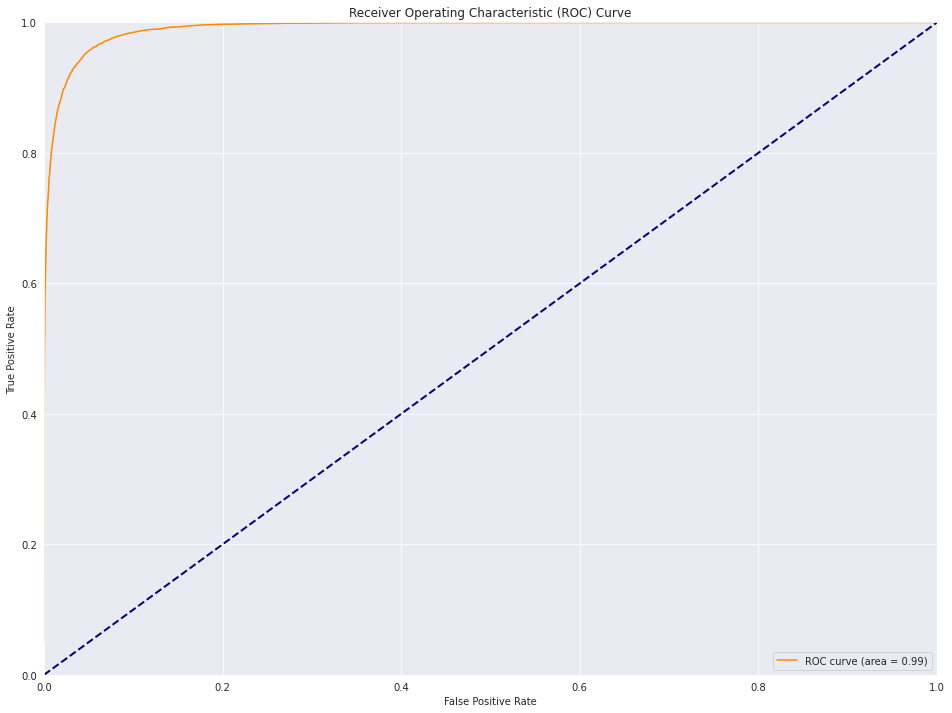

In [18]:
# Fazendo previsões com o modelo
y_scores = model.predict(test_images)

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(test_labels.ravel(), y_scores.ravel())
roc_auc = auc(fpr, tpr)

# Criando um DataFrame com os valores de FPR e TPR
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

plt.figure(figsize=(16, 12))

# Plotando a curva ROC com o Seaborn
sns.set_style('darkgrid')
sns.lineplot(x='False Positive Rate', y='True Positive Rate', data=roc_df, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
sns.lineplot(x=[0, 1], y=[0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


##6.2 Curva de Aprendizado

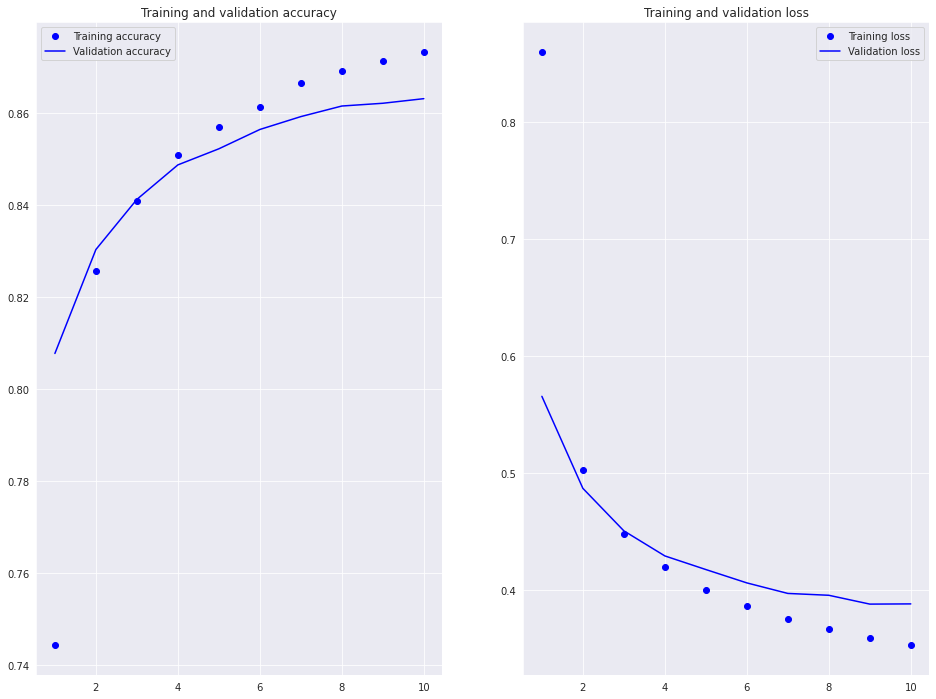

In [19]:
# Plotando a curva de aprendizado
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 12))

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

ax1.plot(epochs, acc, 'bo', label='Training accuracy')
ax1.plot(epochs, val_acc, 'b', label='Validation accuracy')
ax1.set_title('Training and validation accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'bo', label='Training loss')
ax2.plot(epochs, val_loss, 'b', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.legend()

plt.show()


##6.3 Matriz de Confusão

313/313 [==============================] - 4s 12ms/step


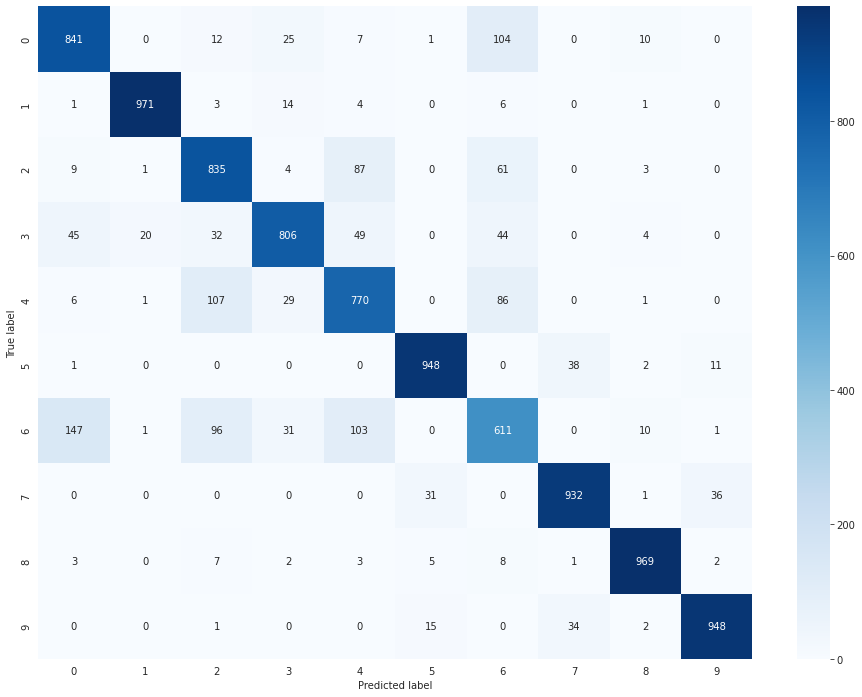

In [20]:
# Obter as previsões do modelo para os dados de teste
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obter as classes reais dos dados de teste
y_true_classes = np.argmax(test_labels, axis=1)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Aumentando o tamanho da figura e imprimindo a matriz de confusão
fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#7.Testando e Visualizando 

## 7.1 Label	Description ->Keras(https://keras.io/api/datasets/fashion_mnist/)
0	T-shirt/top->Camiseta/top

1	Trouser->Calça

2	Pullover->Pulôver

3	Dress->Vestido

4	Coat->Casaco

5	Sandal->Sandália

6	Shirt->Camisa

7	Sneaker->Tênis

8	Bag->Bolsa

9	Ankle boot->Bota de tornozelo


In [48]:
#obtem imagem numero 0
x = test_images[0]
print(x.shape)
x = np.expand_dims(x, axis=0)
print(x.shape)

# imprime a avaliação da amostra
print(model.predict(x))
print(np.argmax(model.predict(x)))

(48, 48, 3)
(1, 48, 48, 3)
1/1 [==============================] - 0s 75ms/step
[[8.8744791e-06 5.8502724e-07 2.1874896e-06 3.9660314e-05 2.8962055e-05
  3.8926459e-03 4.5616365e-05 2.9398104e-02 2.2414510e-05 9.6656090e-01]]
1/1 [==============================] - 0s 39ms/step
9


(10000, 48, 48, 3)


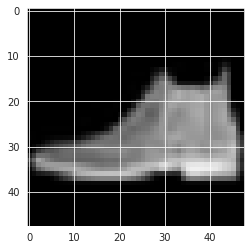

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [50]:
print(test_images.shape) # imprime o tamanho do vetor, (10000, 48, 48)

image = test_images[0] # obtém a imagem do conjunto de teste no índice 0 do vetor
plt.imshow(image, cmap='gray') #exibe a imagem do vetor
plt.show()

print(test_labels[0]) #imprime a classe da imagem de teste do indice 0